# TP Compression d'images taux de compression à atteindre 15

In [169]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pywt
import pywt.data

(512, 512)


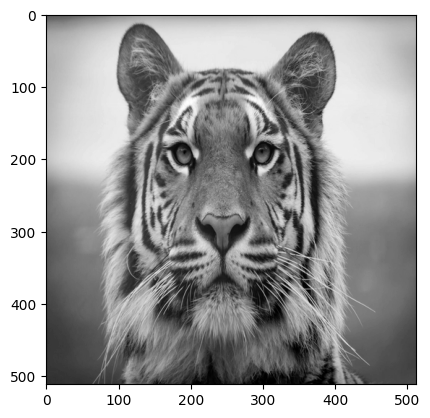

In [170]:
Image = cv2.imread('Images/08.png',0)
plt.imshow(Image,cmap='gray')
print(Image.shape)

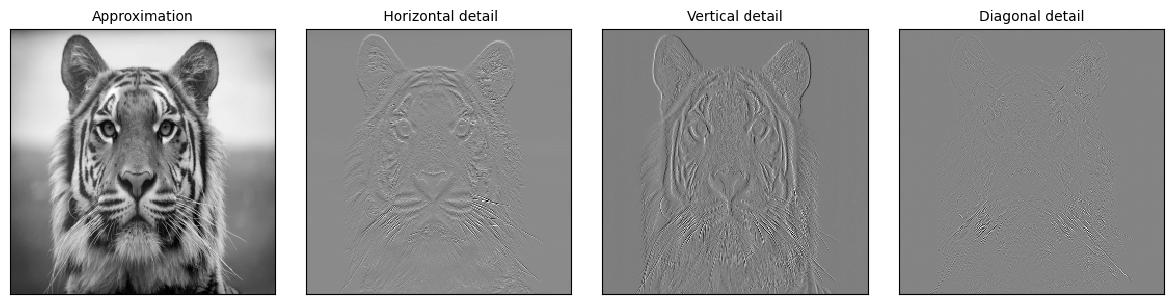

In [171]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(Image, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

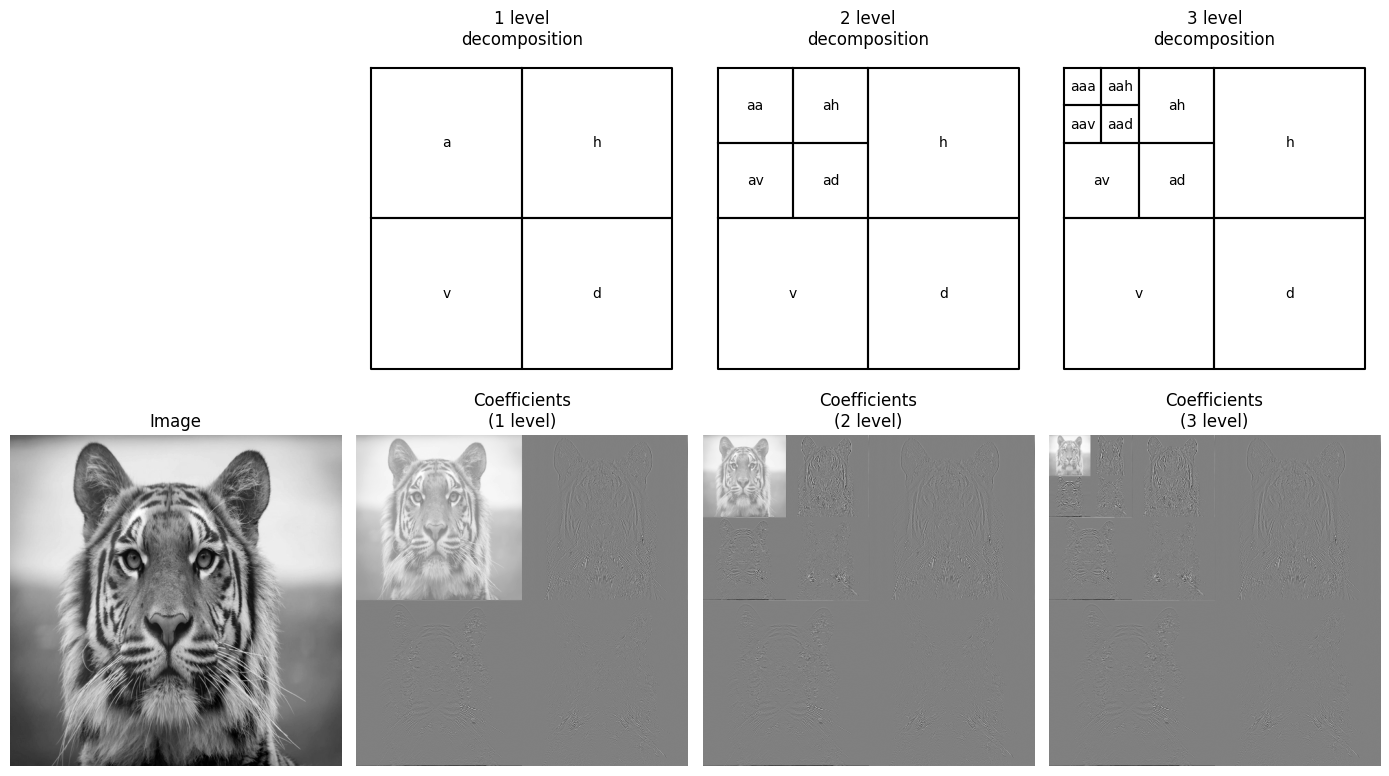

In [172]:
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

shape = Image.shape
fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(Image, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(Image, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()


(100,) (101,)
(100,) (101,)
(100,) (101,)


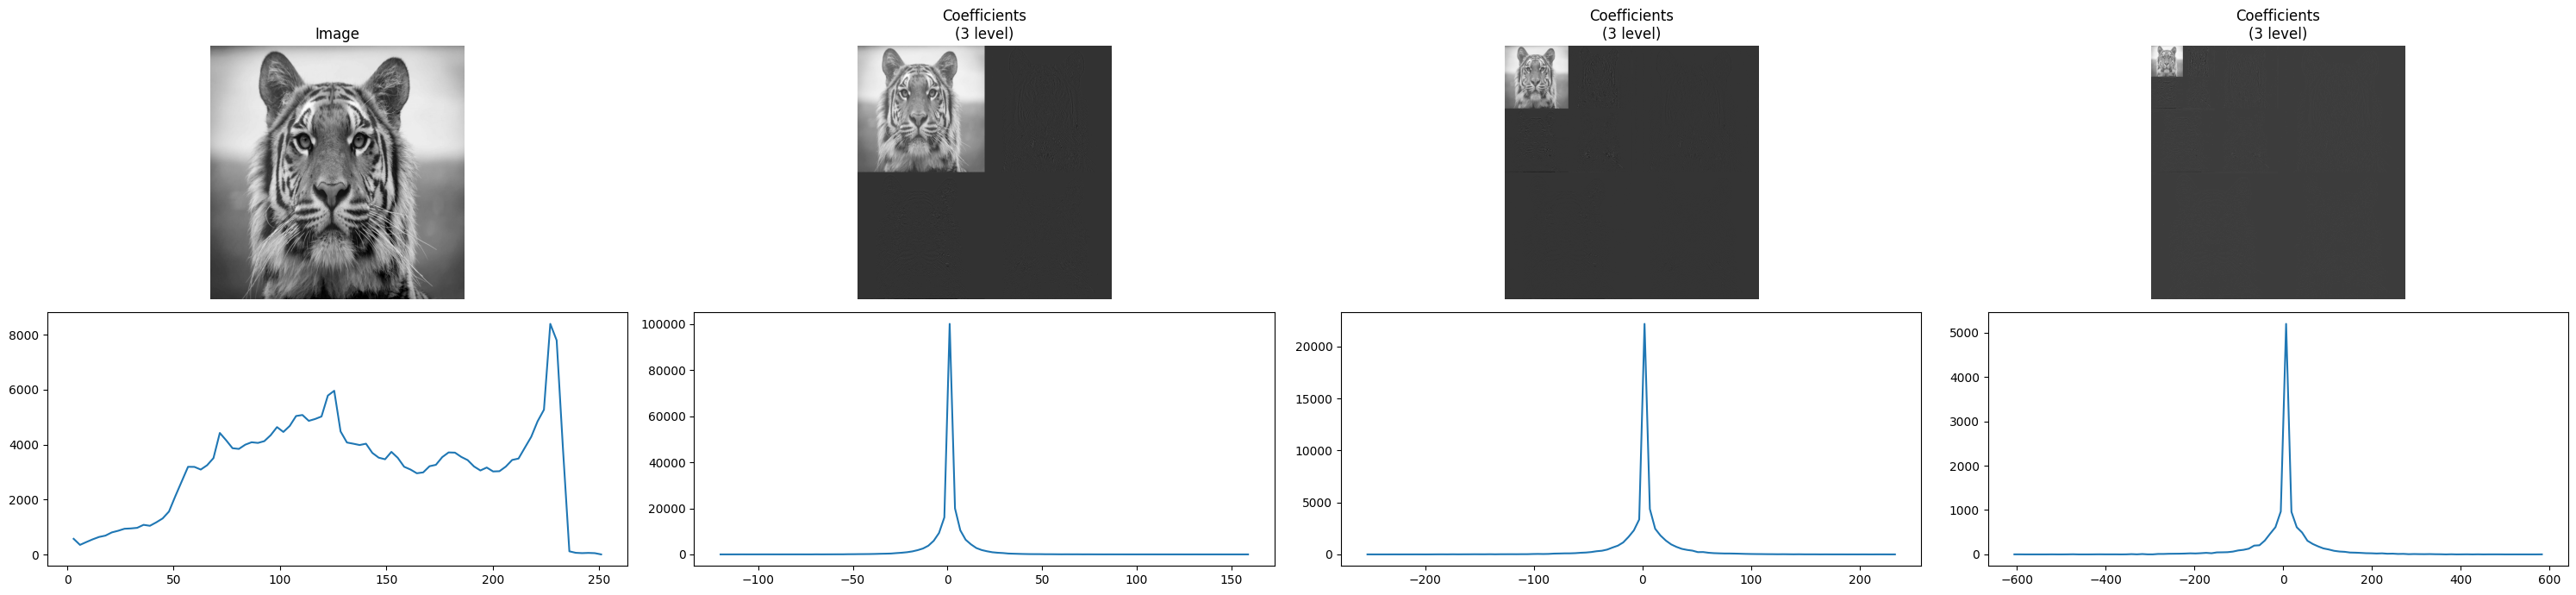

In [178]:
### Méthode décomposition par ondelettes

max_level = 3
fig, axes = plt.subplots(2,max_level+1,figsize=(30,7))
for i in range(0,max_level+1):
    if i == 0:
        # show the original image before decomposition
        axes[0,0].imshow(Image, cmap=plt.cm.gray)
        axes[0,0].set_title('Image')
        axes[0,0].set_axis_off()
        axes[1,0].plot(np.histogram(Image,bins='auto')[1][1:],np.histogram(Image,bins='auto')[0])
        continue
    c = pywt.wavedec2(Image, 'db2', mode='periodization', level=i)
    # print(c[1].shape)
    # c[0] /= np.abs(c[0]).max()
    arr,slices = pywt.coeffs_to_array(c)
    # print(slices)
    axes[0,i].imshow(arr, cmap=plt.cm.gray)
    axes[0,i].set_title('Coefficients\n({} level)'.format(level))
    axes[0,i].set_axis_off()
    
    hist = np.histogram(np.concatenate((c[1][0],c[1][1],c[1][2])),bins=100)
    print(hist[0].shape,hist[1].shape)
    axes[1,i].plot(hist[1][1:],hist[0])
plt.tight_layout()
plt.show()

## Quantification

(512, 512)


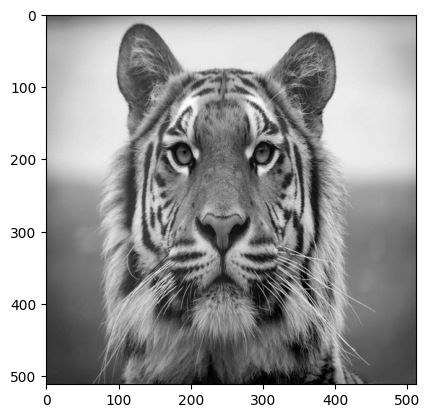

In [179]:
### méthode reconstruction par ondelettes

image_rec = pywt.waverec2(c, 'db2', mode='periodization')
print(image_rec.shape)
plt.imshow(image_rec,cmap='gray')

136.6839714050293 136.68397140502933
0 -3.3306690738754696e-14 251 251.0000000000002
RMSE :  9.751596141048895e-14


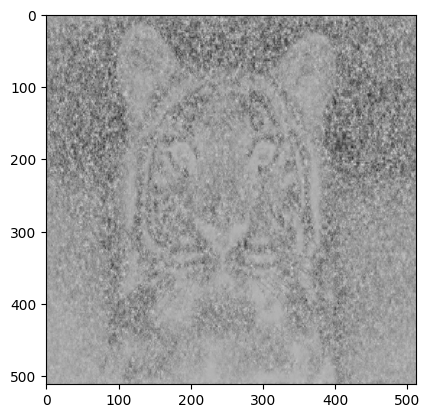

In [180]:
print(np.mean(Image),np.mean(image_rec))
print(np.min(Image),np.min(image_rec), np.max(Image),np.max(image_rec))
Image_diff = Image - image_rec
plt.imshow(Image_diff,cmap='gray')
# print(Image.size)
RMSE = np.sqrt(np.linalg.norm((Image - image_rec))**2 / Image.shape[0]**2)
print("RMSE : ", RMSE)

In [181]:
### Calcul taux de compression

# print("Taux de compression : ",(Image.shape[0]*Image.shape[1])/(c[0].shape[0]*c[0].shape[1]+c[1][0].shape[0]*c[1][0].shape[1]+c[1][1].shape[0]*c[1][1].shape[1]+c[1][2].shape[0]*c[1][2].shape[1]))


P_orig = Image.shape[0]*Image.shape[1]*8
P_comp = c[0].shape[0]*c[0].shape[1]*8+c[1][0].shape[0]*c[1][0].shape[1]*8+c[1][1].shape[0]*c[1][1].shape[1]*8+c[1][2].shape[0]*c[1][2].shape[1]*8
# P_comp
taux_comp = P_orig/P_comp
print("Taux de compression : ",taux_comp)


Taux de compression :  16.0
